# Predict age from resting-state fMRI with Machine Learning

In [ ]:
!pip install nilearn pandas matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 29.2 MB/s eta 0:00:00


# About the dataset

## Movie watching based brain development dataset

## The dataset consists of children (ages 3-13) and young adults (ages 18-39), N=155

## Source: https://openneuro.org/datasets/ds000228/versions/1.0.0

## Reference: Hilary Richardson, et al. Development of the social brain from age three to twelve years. Nature communications, 9(1):1–12, 2018.

# 1. Load the dataset

In [ ]:
# Now fetch the data
from nilearn import datasets
development_dataset = datasets.fetch_development_fmri(data_dir='./nilearn_data', n_subjects=1)

data = development_dataset.func
confounds = development_dataset.confounds


Added README.md to ./nilearn_data


Dataset created in ./nilearn_data/development_fmri


Added README.md to ./nilearn_data/development_fmri


Dataset created in ./nilearn_data/development_fmri/development_fmri



 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


In [ ]:
print(len(data))

1


## 1.2. Lets, look at the phenotype structure

In [ ]:
# Let's load the phenotype data
import pandas as pd

pheno = pd.DataFrame(development_dataset.phenotypic)
pheno.head(4)

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness
0,sub-pixar123,27.06,Adult,adult,F,R


## 1.3. Load the pre-computed dataset

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/file/d/1SbpEl0bNw2WE9SBzy1K1Sufcgsw_KECE/view?usp=drive_link'
output = '64_ROIs_features.npz'
gdown.download(url, output, quiet=False)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1SbpEl0bNw2WE9SBzy1K1Sufcgsw_KECE
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1SbpEl0bNw2WE9SBzy1K1Sufcgsw_KECE/view?usp=drive_link
To: /content/64_ROIs_features.npz
90.0kB [00:00, 15.3MB/s]


'64_ROIs_features.npz'

In [ ]:
!ls

64_ROIs_features.npz  drive  nilearn_data  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

X_features = np.load('/content/drive/MyDrive/NeuroimagingWorkshop_IIITH/64_ROIs_features.npz', allow_pickle=True)['a']

print(X_features.shape)

(155, 2016)


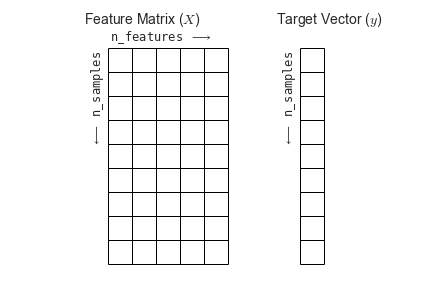![image](samples-features.png)

Text(0, 0.5, 'subjects')

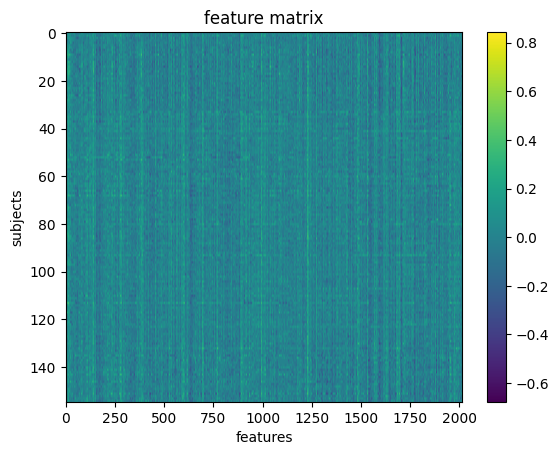

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')


## 1.4. Get targets "`y`"

In [ ]:
# Let's load the phenotype data
import os
pheno_path = os.path.join('./nilearn_data/development_fmri/development_fmri', 'participants.tsv')

In [ ]:
import pandas

pheno = pandas.read_csv(pheno_path, sep='\t').sort_values('participant_id')
pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness,ToM Booklet-Matched,ToM Booklet-Matched-NOFB,FB_Composite,FB_Group,WPPSI BD raw,WPPSI BD scaled,KBIT_raw,KBIT_standard,DCCS Summary,Scanlog: Scanner,Scanlog: Coil,Scanlog: Voxel slize,Scanlog: Slice Gap
0,sub-pixar001,4.774812,4yo,child,M,R,0.80,0.736842,6.0,pass,22.0,13.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
1,sub-pixar002,4.856947,4yo,child,F,R,0.72,0.736842,4.0,inc,18.0,9.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.1
2,sub-pixar003,4.153320,4yo,child,F,R,0.44,0.421053,3.0,inc,15.0,9.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
3,sub-pixar004,4.473648,4yo,child,F,R,0.64,0.736842,2.0,fail,17.0,10.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.2
4,sub-pixar005,4.837782,4yo,child,F,R,0.60,0.578947,4.0,inc,13.0,5.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.2


In [ ]:
y_age = pheno['Age']

<ipython-input-38-2843c97d348c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_age)


<Axes: xlabel='Age', ylabel='Density'>

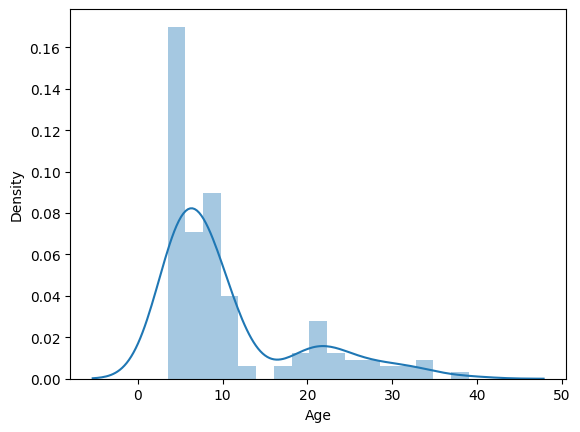

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_age)


# 2. Prepare data for machine learning

## 2.1. Here, we will define a “training sample” where we can play around with our models. We will also set aside a “validation” sample that we will not touch until the end

In [ ]:
age_class = pheno['AgeGroup']
age_class.value_counts()

,count
AgeGroup,
5yo,34
8-12yo,34
Adult,33
7yo,23
3yo,17
4yo,14


In [ ]:
from sklearn.model_selection import train_test_split

# Split the sample to training/validation with a 60/40 ratio, and
# stratify by age class, and also shuffle the data.

X_train, X_val, y_train, y_val = train_test_split(X_features, # x
                                                  y_age, # y
                                                  test_size = 0.4, # 60%/40% split
                                                  shuffle = True, # shuffle dataset
                                                                  # before splitting
                                                  stratify = age_class,  # keep
                                                                         # distribution
                                                                         # of ageclass
                                                                         # consistent
                                                                         # betw. train
                                                                         # & test sets.
                                                  random_state = 123 # same shuffle each
                                                                       # time
                                                  )

# print the size of our training and test groups
print('training:', len(X_train),
     'testing:', len(X_val))

training: 93 testing: 62


# 3. Run the model

## 3.1. We’ll start with a fairly standard regression model called a Support Vector Regressor (SVR).

In [ ]:
from sklearn.svm import SVR
l_svr = SVR(kernel='linear') # define the model

l_svr.fit(X_train, y_train) # fit the model

SVR(kernel='linear')

In [ ]:
# predict the training data based on the model
y_pred = l_svr.predict(X_train)

# caluclate the model accuracy
acc = l_svr.score(X_train, y_train)

accuracy (R2) 0.9917456841636866


Text(0.5, 0, 'Predicted Age')

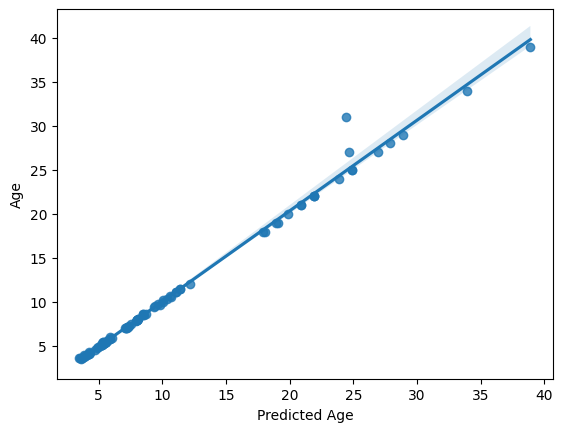

In [ ]:
# print results
print('accuracy (R2)', acc)

sns.regplot(x=y_pred, y=y_train)
plt.xlabel('Predicted Age')

## 3.2. K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
l_svr = SVR(kernel='linear') # define the model
# predict
y_pred = cross_val_predict(l_svr, X_train, y_train, cv=10)
# scores
acc = cross_val_score(l_svr, X_train, y_train, cv=10)
mae = cross_val_score(l_svr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')


In [ ]:
# We can look at the accuracy of the predictions for each fold of the cross-validation

for i in range(10):
    print('Fold {} -- Acc = {}, MAE = {}'.format(i, acc[i],-mae[i]))

Fold 0 -- Acc = -7.676064641752474, MAE = 5.332931378682494
Fold 1 -- Acc = 0.03451580948932054, MAE = 5.527461537958665
Fold 2 -- Acc = 0.055363384951097716, MAE = 7.76533956651639
Fold 3 -- Acc = -0.22105346354211686, MAE = 4.466280739531596
Fold 4 -- Acc = 0.21869739076809125, MAE = 7.545773684051546
Fold 5 -- Acc = -0.0362412100777163, MAE = 5.541887034816059
Fold 6 -- Acc = -0.47990317732198084, MAE = 8.09035402347338
Fold 7 -- Acc = 0.24733941902437218, MAE = 4.0319223641391915
Fold 8 -- Acc = -15.250504915673567, MAE = 6.084423017546659
Fold 9 -- Acc = 0.5995800299425675, MAE = 2.7521034395936166


R2: -0.004791771401066569
MAE: 5.729806704945634


Text(0.5, 0, 'Predicted Age')

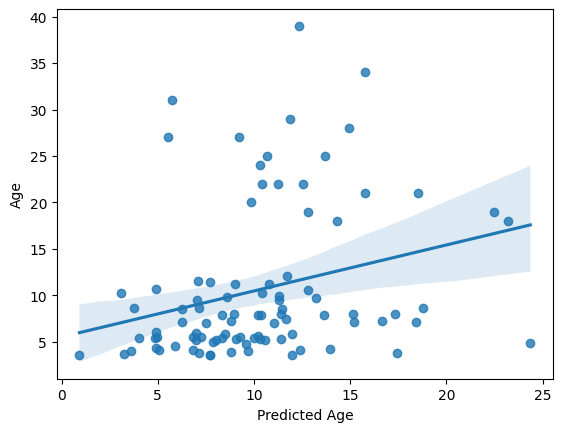

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


overall_acc = r2_score(y_train, y_pred)
overall_mae = mean_absolute_error(y_train, y_pred)
print('R2:',overall_acc)
print('MAE:',overall_mae)

sns.regplot(x=y_pred, y=y_train)
plt.xlabel('Predicted Age')


## 3.3. Normalize the target data

<ipython-input-47-659cb9ab25b7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_log)


Text(0.5, 1.0, 'Log-Transformed Age')

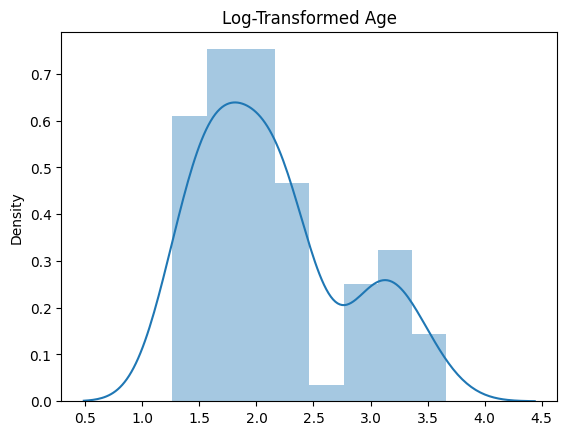

In [ ]:
# Create a log transformer function and log transform Y (age)

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func = np.log, validate=True)
log_transformer.fit(y_train.values.reshape(-1,1))
y_train_log = log_transformer.transform(y_train.values.reshape(-1,1))[:,0]

sns.distplot(y_train_log)
plt.title("Log-Transformed Age")

R2: 0.1273853395270138
MAE: 0.4581074788227969


Text(0, 0.5, 'Log Age')

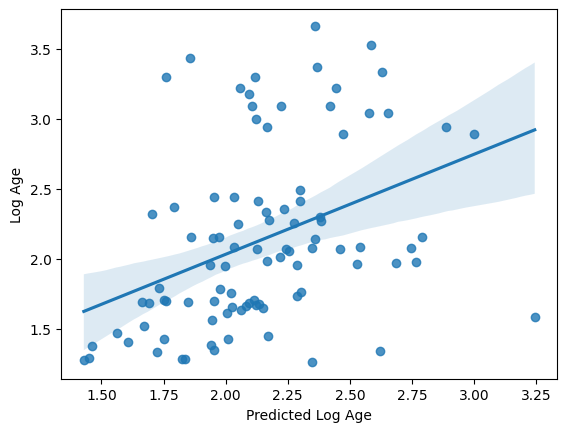

In [ ]:
# predict
y_pred = cross_val_predict(l_svr, X_train, y_train_log, cv=10)

# scores
acc = r2_score(y_train_log, y_pred)
mae = mean_absolute_error(y_train_log,y_pred)

print('R2:',acc)
print('MAE:',mae)

sns.regplot(x=y_pred, y=y_train_log)
plt.xlabel('Predicted Log Age')
plt.ylabel('Log Age')

R2: 0.1273853395270138
MAE: 0.4581074788227969


Text(0, 0.5, 'Log Age')

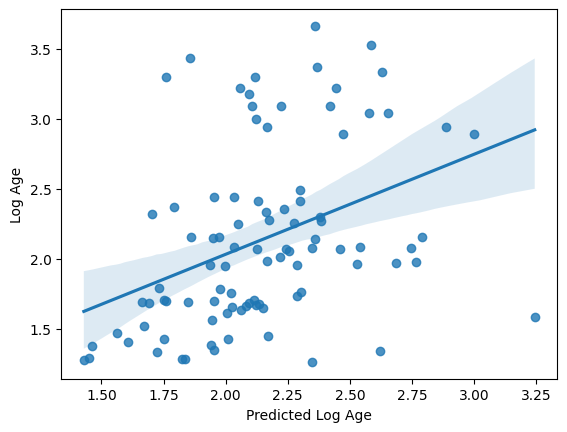

In [ ]:
y_pred = cross_val_predict(SVR(kernel='linear',C=0.10,epsilon=0.10, gamma='auto'),
                           X_train, y_train_log, cv=10)

# scores
acc = r2_score(y_train_log, y_pred)
mae = mean_absolute_error(y_train_log,y_pred)

print('R2:',acc)
print('MAE:',mae)

sns.regplot(x=y_pred, y=y_train_log)
plt.xlabel('Predicted Log Age')
plt.ylabel('Log Age')

# 4. Tweak the model hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

C_range = 10. ** np.arange(-3, 8)
epsilon_range = 10. ** np.arange(-3, 8)

param_grid = dict(epsilon=epsilon_range, C=C_range)

grid = GridSearchCV(l_svr, param_grid=param_grid, cv=10)

grid.fit(X_train, y_train_log)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06, 1.e+07]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06, 1.e+07])})

In [ ]:
print(grid.best_params_)

{'C': 0.01, 'epsilon': 0.01}


R2: 0.1273853395270138
MAE: 0.4581074788227969


Text(0, 0.5, 'Log Age')

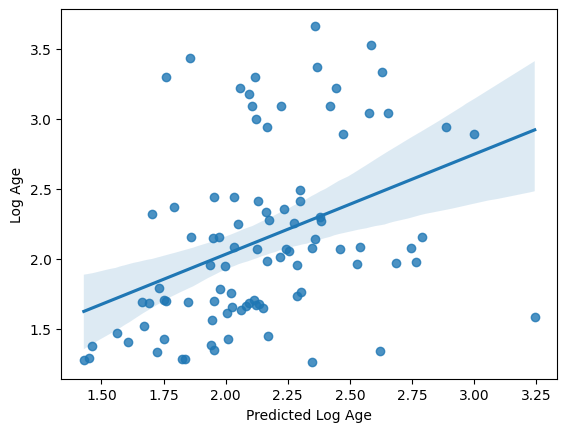

In [ ]:
y_pred = cross_val_predict(SVR(kernel='linear',C=0.10,epsilon=0.10, gamma='auto'),
                           X_train, y_train_log, cv=10)

# scores
acc = r2_score(y_train_log, y_pred)
mae = mean_absolute_error(y_train_log,y_pred)

print('R2:',acc)
print('MAE:',mae)

sns.regplot(x=y_pred, y=y_train_log)
plt.xlabel('Predicted Log Age')
plt.ylabel('Log Age')

# 5. Can our model predict age in completely un-seen data?¶


In [ ]:
# Because we performed a log transformation on our training data, we will need to transform our testing data using the same information! But that’s easy because we stored our transformation in an object!

# Notice how we use the Scaler that was fit to X_train and apply to X_test,
# rather than creating a new Scaler for X_test
y_val_log = log_transformer.transform(y_val.values.reshape(-1,1))[:,0]

accuracy (r2) = 0.288888333996296
mae =  0.4115055082849326


Text(0, 0.5, 'Log Age')

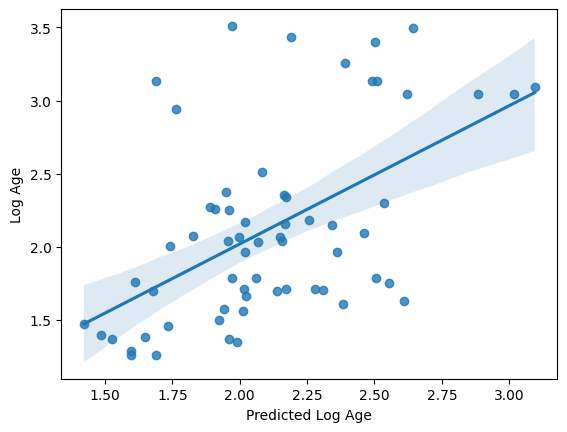

In [ ]:
l_svr.fit(X_train, y_train_log) # fit to training data
y_pred = l_svr.predict(X_val) # classify age class using testing data
acc = l_svr.score(X_val, y_val_log) # get accuracy (r2)
mae = mean_absolute_error(y_val_log, y_pred) # get mae

# print results
print('accuracy (r2) =', acc)
print('mae = ',mae)

# plot results
sns.regplot(x=y_pred, y=y_val_log)
plt.xlabel('Predicted Log Age')
plt.ylabel('Log Age')

# 6. Model interpretation

In [ ]:
l_svr.coef_.shape

(1, 2016)

Text(0, 0.5, 'weight')

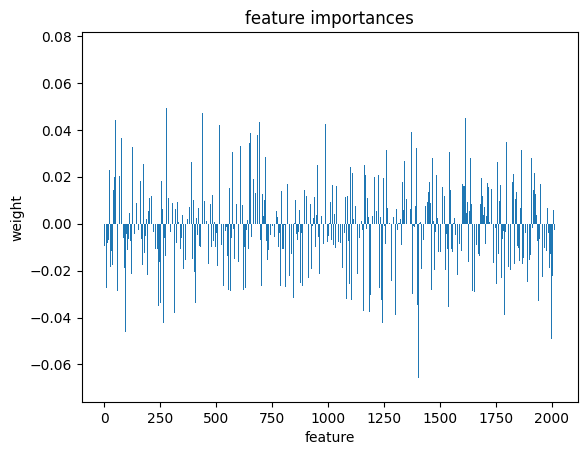

In [ ]:
plt.bar(range(l_svr.coef_.shape[-1]), l_svr.coef_[0])
plt.title('feature importances')
plt.xlabel('feature')
plt.ylabel('weight')

In [ ]:
#We can use the correlation measure from before to perform an inverse transform
import numpy as np

time_series = np.loadtxt('/content/drive/MyDrive/NeuroimagingWorkshop_IIITH/time_series.csv')

from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation',
                                          vectorize=True, discard_diagonal=True)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
print(correlation_matrix.shape)
print(correlation_measure.inverse_transform(l_svr.coef_).shape)


(2016,)
(1, 64, 64)


In [ ]:
matrix_ = correlation_measure.inverse_transform(l_svr.coef_)[0]

In [ ]:
from nilearn import datasets

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

from nilearn import plotting
coords = plotting.find_parcellation_cut_coords(atlas_filename)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/basc_multiscale_2015



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/basc_multiscale_2015/53337d5c408465aa257d35f81c13413b/1861819..... done.


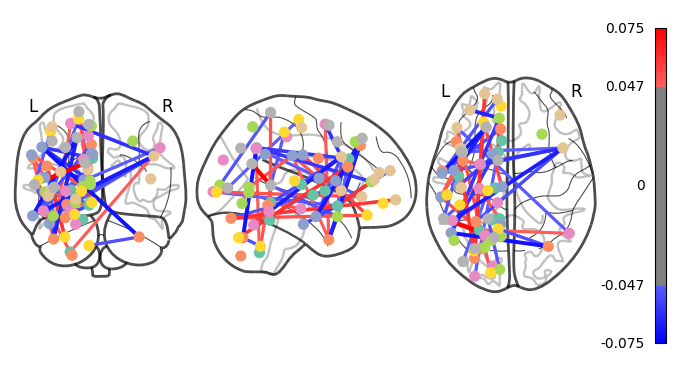

In [ ]:
plotting.plot_connectome(matrix_, coords, colorbar=True, edge_threshold='98%')


In [ ]:
%matplotlib notebook
plotting.view_connectome(matrix_, coords, edge_threshold='98%')